In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [406]:
df = pd.read_csv("../data/covid19_tweets.csv")
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0",NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. Bush Admin Alum. Newsmax Contributor. Fmr Exec Dir NYSGOP",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,"🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir",2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [408]:
df["source"].value_counts()

source
Twitter Web App               22974
Twitter for Android           16758
Twitter for iPhone            15824
TweetDeck                      3453
Hootsuite Inc.                 2846
                              ...  
Post to Social by SHIFT1          1
PRNewswire                        1
Hep Auto Tweet                    1
Chorus publishing platform        1
Tweecha Lite                      1
Name: count, Length: 450, dtype: int64

In [409]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


def getYear(string):
    return int(string[0:4])


def getDate(string):
    return int(string[5:7])


# Apply label encoding to the categorical column
df["user_location"] = label_encoder.fit_transform(df["user_location"])
df["user_verified"] = label_encoder.fit_transform(df["user_verified"])
df["user_friends"] = label_encoder.fit_transform(df["user_friends"])


# List of sources to keep
sources_to_keep = [
    "Twitter Web App",  #
    "Twitter for Android",
    "Twitter for iPhone",
    "TweetDeck",
    "Hootsuite Inc.",
]

# Create a boolean mask where the "source" column contains values to keep
mask = df["source"].isin(sources_to_keep)

# Use the mask to filter the DataFrame and keep only the rows with the specified sources
df = df[mask]

# Apply label encoding to the categorical column
df["source"] = label_encoder.fit_transform(df["source"])


df["user_verified"] = df["user_verified"].astype(int)
df["user_created"] = df["user_created"].apply(lambda x: getYear(x))
df["date"] = df["date"].apply(lambda x: getDate(x))
df["user_friends"] = df["user_friends"].apply(int)


df = df[
    [
        "source",
        "user_location",
        "user_verified",
        "user_friends",
        "user_created",
        "date",
        "user_followers",
    ]
]


df

C:\Users\almei\AppData\Local\Temp\ipykernel_22436\1820033881.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["source"] = label_encoder.fit_transform(df["source"])
C:\Users\almei\AppData\Local\Temp\ipykernel_22436\1820033881.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["user_verified"] = df["user_verified"].astype(int)
C:\Users\almei\AppData\Local\Temp\ipykernel_22436\1820033881.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,source,user_location,user_verified,user_friends,user_created,date,user_followers
0,4,13448,0,950,2017,7,624
1,3,8326,1,1677,2009,7,2253
2,3,9318,0,6093,2009,7,9275
3,4,11242,0,987,2019,7,197
4,3,5706,0,168,2017,7,101009
...,...,...,...,...,...,...,...
74431,4,6549,0,586,2010,8,85
74432,2,14612,0,1066,2013,8,4289
74433,2,14476,0,102,2018,8,1413
74434,4,14622,0,1733,2014,8,2554


In [410]:
df["source"].value_counts()

# Twitter Web App               22974
# Twitter for Android           16758
# Twitter for iPhone            15824
# TweetDeck                      3453
# Hootsuite Inc.                 2846

source
2    22974
3    16758
4    15824
1     3453
0     2846
Name: count, dtype: int64

In [411]:
df["source"]

0        4
1        3
2        3
3        4
4        3
        ..
74431    4
74432    2
74433    2
74434    4
74435    3
Name: source, Length: 61855, dtype: int32

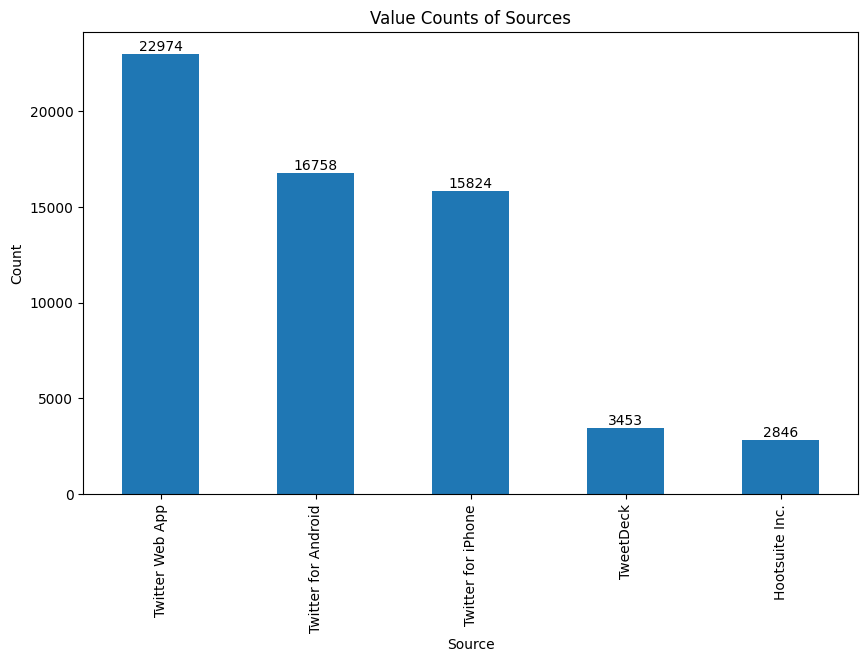

In [412]:
import pandas as pd


# Sample DataFrame with a "source" column
data = {
    "source": ["Twitter Web App"] * 22974
    + ["Twitter for Android"] * 16758
    + ["Twitter for iPhone"] * 15824
    + ["TweetDeck"] * 3453
    + ["Hootsuite Inc."] * 2846
}

df2 = pd.DataFrame(data)

# Calculate the value counts for the "source" column
value_counts = df2["source"].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = value_counts.plot(kind="bar")
plt.xlabel("Source")
plt.ylabel("Count")
plt.title("Value Counts of Sources")

# Add counts on top of the bars
for i, count in enumerate(value_counts):
    ax.text(i, count, str(count), ha="center", va="bottom")

plt.show()

In [413]:
df.corr()

,source,user_location,user_verified,user_friends,user_created,date,user_followers
source,1.000000,0.046747,-0.219893,0.002714,0.088190,0.012521,-0.120233
user_location,0.046747,1.000000,-0.104989,-0.054456,0.161677,0.009541,-0.059597
user_verified,-0.219893,-0.104989,1.000000,-0.012004,-0.204295,-0.028565,0.324782
user_friends,0.002714,-0.054456,-0.012004,1.000000,-0.283320,0.030711,-0.039250
user_created,0.088190,0.161677,-0.204295,-0.283320,1.000000,-0.021525,-0.123440
date,0.012521,0.009541,-0.028565,0.030711,-0.021525,1.000000,-0.023420
user_followers,-0.120233,-0.059597,0.324782,-0.039250,-0.123440,-0.023420,1.000000


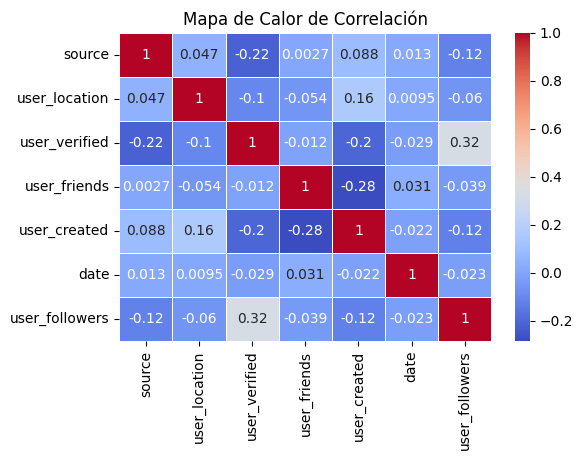

In [414]:
correlation_matrix = df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()

In [415]:
df["hashtags"].unique()

KeyError: 'hashtags'

In [ ]:
import json


df["hashtags"] = df["hashtags"].str.replace("'", '"')


parsed_hashtags = []


for hash in df["hashtags"]:
    hash = str(hash)
    parsed_hashtags.append(json.loads(hash) if hash != "nan" else None)

print(parsed_hashtags)

[None, None, ['COVID19'], ['COVID19'], ['CoronaVirusUpdates', 'COVID19'], ['coronavirus', 'covid19'], ['COVID19', 'Recruiting'], None, ['covid19', 'covidPositive'], ['HurricaneHanna', 'COVID19'], None, ['logo', 'graphicdesigner', 'logodesign', 'logodesinger', 'icon', 'minimalist', 'Abstract'], ['COVID19'], ['COVID19'], None, ['Covid19', 'keepsocialdistance'], ['COVID19', 'TamilNadu', 'chennai'], ['COVID19', 'homework'], ['light'], None, None, None, None, ['WASH', 'COVID19'], ['COVID19'], ['Kolar', 'Blood', 'COVID19'], ['BosniaandHerzegovina'], ['COVID19'], ['TNCoronaUpdate', 'TN', 'COVID19'], None, ['FEMA', 'PuertoRico', 'COVID19'], ['Covid19', 'Vishal'], ['covid19', 'Africa'], ['COVID19'], None, None, ['COVID19'], ['COVID19', 'climate'], ['BorisJohnson', '5COBRA', 'Five'], ['COVID19'], ['PlayYourPart', 'COVID19'], ['Covid19'], ['COVID19'], ['Delhi', 'COVID19'], None, ['TamilNadu', 'COVID19'], ['RutoSwindlingGEMA', 'COVID19'], None, None, ['TamilNadu', 'COVID19'], None, None, None, Non

In [ ]:
parsed_months = []

df["month"].apply(lambda x: parsed_months.append(parsed_months))

df

,month,hashtags
0,7,NaN
1,7,NaN
2,7,"[""COVID19""]"
3,7,"[""COVID19""]"
4,7,"[""CoronaVirusUpdates"", ""COVID19""]"
...,...,...
74431,8,"[""COVID19"", ""QuarantineLife""]"
74432,8,"[""TechIntersect"", ""Bitcoin"", ""COVID19""]"
74433,8,"[""China"", ""Xinjiang""]"
74434,8,"[""COVID19""]"


In [ ]:
# Supongamos que tu DataFrame se llama df
hashtags_df = df.explode("hashtags")
hashtags_counts = hashtags_df.groupby("month")["hashtags"].count().reset_index()
hashtags_counts.columns = ["Month", "Hashtag Count"]

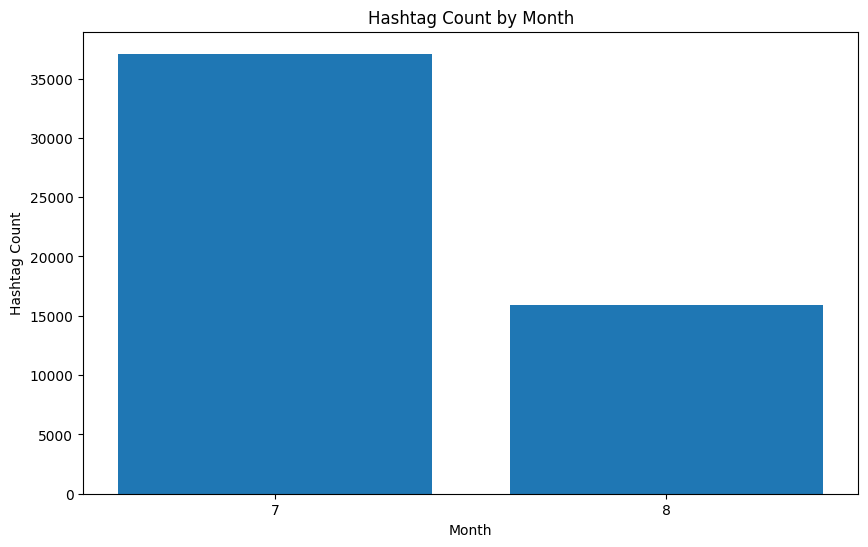

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(hashtags_counts["Month"], hashtags_counts["Hashtag Count"])
plt.xlabel("Month")
plt.ylabel("Hashtag Count")
plt.title("Hashtag Count by Month")
plt.xticks(hashtags_counts["Month"])
plt.show()

AttributeError: 'DataFrame' object has no attribute 'plt'